In [ ]:
import sklearn
import numpy as np

from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels=[]
train_samples=[]

In [ ]:
for i in range(1000):

    random_younger=np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older =np.random.randint(65,101)
    train_samples.append(random_older)
    train_labels.append(1)
    
    
for i in range(50):
    np.random.seed(1)
    random_younger =np.random.randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older=np.random.randint(65,100)
    train_samples.append(random_younger)
    train_labels.append(1)
    


In [ ]:
train_labels=np.array(train_labels)

In [ ]:
train_samples=np.array(train_samples)

In [ ]:
train_samples.shape

(2100,)

In [ ]:
scaler=MinMaxScaler(feature_range=(0, 1))
scaled_Data= scaler.fit_transform(train_samples.reshape(-1,1))

In [ ]:
scaled_Data.shape

(2100, 1)

In [ ]:
scaled_Data

array([[0.31034483],
       [1.        ],
       [0.24137931],
       ...,
       [0.42528736],
       [0.42528736],
       [0.42528736]])

In [ ]:
train_labels.shape

(2100,)

# Create an artificial neural network with Keras

In [ ]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
model=Sequential((Dense(16,input_shape=(1,), activation='relu'),
                  Dense(32, activation='relu'),
                  Dense(2, activation='softmax')))


In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_20 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_21 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(scaled_Data,train_labels, validation_split=0.1,epochs=20, batch_size=10, shuffle=True, verbose=2)

# Make predictions with an artificial neural network using Keras

In [ ]:
predictions=model.predict(scaled_Data,batch_size=10,verbose=0)

In [ ]:
predictionss=model.predict_classes(scaled_Data, batch_size=10,verbose=0)

# Create confusion matrix for predictions from Keras model

In [ ]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [ ]:
cm=confusion_matrix(train_labels,predictionss)

In [ ]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    # Compute confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks=np.arange(len(classes))
    plt.xticks=(tick_marks,classes,)
    plt.yticks=(tick_marks,classes)
    
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j]),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Label') 
    plt.xlabel('Predicted Label')
    


Confusion matrix, without normalization
[[ 992   58]
 [  50 1000]]


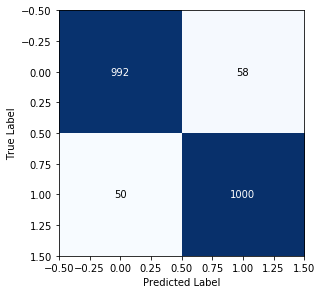

In [ ]:
cm_plot_Labels=['no side effects', 'have side effects']

plot_confusion_matrix(cm,cm_plot_Labels,title='Normalized confusion matrix')

In [ ]:
help(plot_confusion_matrix)

In [ ]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import itertools
%matplotlib inline 



#help(Sequential)


In [ ]:
train_path="C:\\Users\\sahin\\cats and dogs\\train"
test_path="C:\\Users\\sahin\\cats and dogs\\test"
valid_path="C:\\Users\\sahin\\cats and dogs\\valid"

In [ ]:
train_batches=ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224),classes=('cat','dog'),batch_size=10)
test_batches=ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224,),classes=('cat','dog'), batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=('cat','dog'), batch_size=4)


Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')




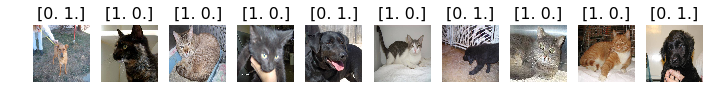

In [ ]:
plots(imgs, titles= labels)

In [ ]:
model1=Sequential((Conv2D(32,(3,3), activation='relu', input_shape=(224,224,3)),Flatten(), Dense(1, activation='softmax'),))

In [ ]:
model1.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_4 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1577089   
Total params: 1,577,985
Trainable params: 1,577,985
Non-trainable params: 0
_________________________________________________________________
